## Imports

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import matplotlib.pyplot as plt
import pandas as pd
import json
from glob import glob
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [4]:
mdl_df = pd.read_csv("../models/results.csv")
mdl_df

,Unnamed: 0,version,folds,img_size,resize,batch_size,epochs,patience,backbone,loss,mirror,umodel,bce_weight,shift,pseudo,lr,best_epoch,best_loss,best_dice_coef,split,seed,bavg_epoch,bavg_loss,bavg_dice_coef,dice_by_folds,mixed_precision,aughard,norm,bnw,weights,triple,reduce_dims,ext,bermerkung
0,0,6,1,256,1,20,30,20,efficientnetb7,bce_dice,False,unet,1.0,True,NaN,0.0002,25.0,0.004156,0.894248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,13,4,256,1,32,40,20,efficientnetb7,bce_dice,False,unet,1.0,True,NaN,0.0002,NaN,NaN,NaN,kfold,NaN,15.500000,0.236562,0.454637,0.6554 0.4974 0.5797 0.0861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,14,4,256,4,32,40,20,efficientnetb7,bce_dice,False,unet,1.0,True,NaN,0.0010,NaN,NaN,NaN,kfold,NaN,24.666667,NaN,NaN,nan 0.2318 0.3154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,22,1,256,4,64,1,20,efficientnetb0,bce_dice,False,unet,1.0,True,NaN,0.0001,NaN,NaN,NaN,dont,NaN,0.000000,0.516637,0.077527,0.0775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,24,1,256,4,32,20,20,efficientnetb0,bce_dice,False,unet,1.0,True,NaN,0.0001,NaN,NaN,NaN,dont,42.0,15.000000,0.027320,0.777308,0.7773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,25,1,256,4,32,20,20,efficientnetb0,bce_dice,False,unet,1.0,True,NaN,0.0001,NaN,NaN,NaN,dont,42.0,19.000000,0.019676,0.884997,0.8850,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,17,4,256,4,16,30,20,efficientnetb5,bce_dice,False,unet,1.0,True,NaN,0.0002,NaN,NaN,NaN,kfold,NaN,13.000000,0.083721,0.637541,0.8200 0.8174 0.1290 0.7837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,27,1,256,4,32,20,10,efficientnetb0,bce_dice,False,unet,1.0,True,NaN,0.0001,NaN,NaN,NaN,dont,69.0,16.000000,0.033654,0.662921,0.6629,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,31,1,256,4,32,20,10,efficientnetb0,bce_dice,False,unet,1.0,True,NaN,0.0001,NaN,NaN,NaN,dont,69.0,11.000000,0.073768,0.667674,0.6677,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,26,1,256,4,32,100,10,efficientnetb0,bce_dice,False,unet,1.0,True,NaN,0.0001,NaN,NaN,NaN,dont,42.0,46.000000,0.025203,0.899880,0.8999,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotfunction

In [5]:
def plot_vers(VERS):
    fig, axes = plt.subplots(figsize = (32, 32), nrows = 2, ncols = 2)
    for VER in VERS: 
        hist_paths = glob(f"../models/models_v{VER:03}/history_*")
        i = 0
        for hist_path in hist_paths:
            history = json.load(open(hist_path))
        
            dice_coef = np.array(history["dice_coef"]).astype(np.float32)
            val_dice_coef = np.array(history["val_dice_coef"]).astype(np.float32)
            loss = np.array(history["loss"]).astype(np.float32)
            val_loss = np.array(history["val_loss"]).astype(np.float32)
            
            axes[0,0].plot(dice_coef, label = f"{VER} f: {i}")
            axes[0,1].plot(val_dice_coef, label = f"{VER} f: {i}")
            axes[1,0].plot(loss, label = f"{VER} f: {i}")
            axes[1,1].plot(val_loss, label = f"{VER} f: {i}")
            
            axes[0,0].legend()
            axes[0,0].set_title("dice_coef")
            axes[0,1].set_title("val_dice_coef")
            axes[1,0].set_title("loss")
            axes[1,1].set_title("val_loss")
            
            i += 1
    plt.show()


In [6]:
mdl_df.sort_values("bavg_dice_coef", ascending = False)

,Unnamed: 0,version,folds,img_size,resize,batch_size,epochs,patience,backbone,loss,mirror,umodel,bce_weight,shift,pseudo,lr,best_epoch,best_loss,best_dice_coef,split,seed,bavg_epoch,bavg_loss,bavg_dice_coef,dice_by_folds,mixed_precision,aughard,norm,bnw,weights,triple,reduce_dims,ext,bermerkung
31,31,71,1,256,4,64,1000,20,resnext101,bce_jaccard_loss,False,link,1.0,True,NaN,0.0001,NaN,NaN,NaN,dont,69.0,156.000000,0.011064,0.927117,0.9271,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,50,128,1,512,4,32,1000,20,efficientnetb0,bce_jaccard_loss,False,link,1.0,True,NaN,0.0005,NaN,NaN,NaN,dont,69.0,104.000000,0.009087,0.924909,0.9249,True,True,True,True,NaN,True,False,NaN,NaN
12,12,38,1,256,4,32,100,10,efficientnetb7,bce_dice,False,unet,1.0,True,NaN,0.0001,NaN,NaN,NaN,kfold,69.0,52.000000,0.017930,0.922658,0.9227,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,25,61,1,256,4,128,1000,20,resnext50,bce_jaccard_loss,False,link,1.0,True,NaN,0.0001,NaN,NaN,NaN,dont,69.0,109.000000,0.011597,0.922328,0.9223,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,27,70,1,256,4,64,1000,20,densenet201,bce_jaccard_loss,False,link,1.0,True,NaN,0.0001,NaN,NaN,NaN,dont,69.0,82.000000,0.012208,0.920322,0.9203,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,64,162,1,256,4,32,1000,30,efficientnetb7,bce_jaccard_loss,False,link,1.0,True,1.0,0.0005,NaN,NaN,NaN,dont,69.0,69.000000,0.017459,0.917833,0.9178,True,True,NaN,True,NaN,NaN,True,True,NaN
51,51,129,1,512,4,32,1000,20,efficientnetb0,bce_jaccard_loss,False,link,1.0,True,NaN,0.0005,NaN,NaN,NaN,dont,69.0,87.000000,0.008998,0.917775,0.9178,True,True,True,True,NaN,True,False,NaN,NaN
62,62,161,1,256,4,128,1000,20,efficientnetb0,bce_jaccard_loss,False,link,1.0,True,NaN,0.0010,NaN,NaN,NaN,dont,69.0,96.000000,0.022154,0.917613,0.9176,True,True,NaN,True,NaN,NaN,True,True,NaN
69,69,173,1,256,4,128,1000,20,efficientnetb0,bce_jaccard_loss,False,link,1.0,True,1.0,0.0020,NaN,NaN,NaN,dont,69.0,61.000000,0.017488,0.916477,0.9165,True,True,NaN,True,NaN,NaN,False,True,no dimension split
59,59,153,1,256,4,128,1000,20,efficientnetb0,bce_jaccard_loss,False,link,1.0,True,NaN,0.0005,NaN,NaN,NaN,dont,69.0,107.000000,0.012169,0.913624,0.9136,True,True,True,True,NaN,True,False,NaN,NaN


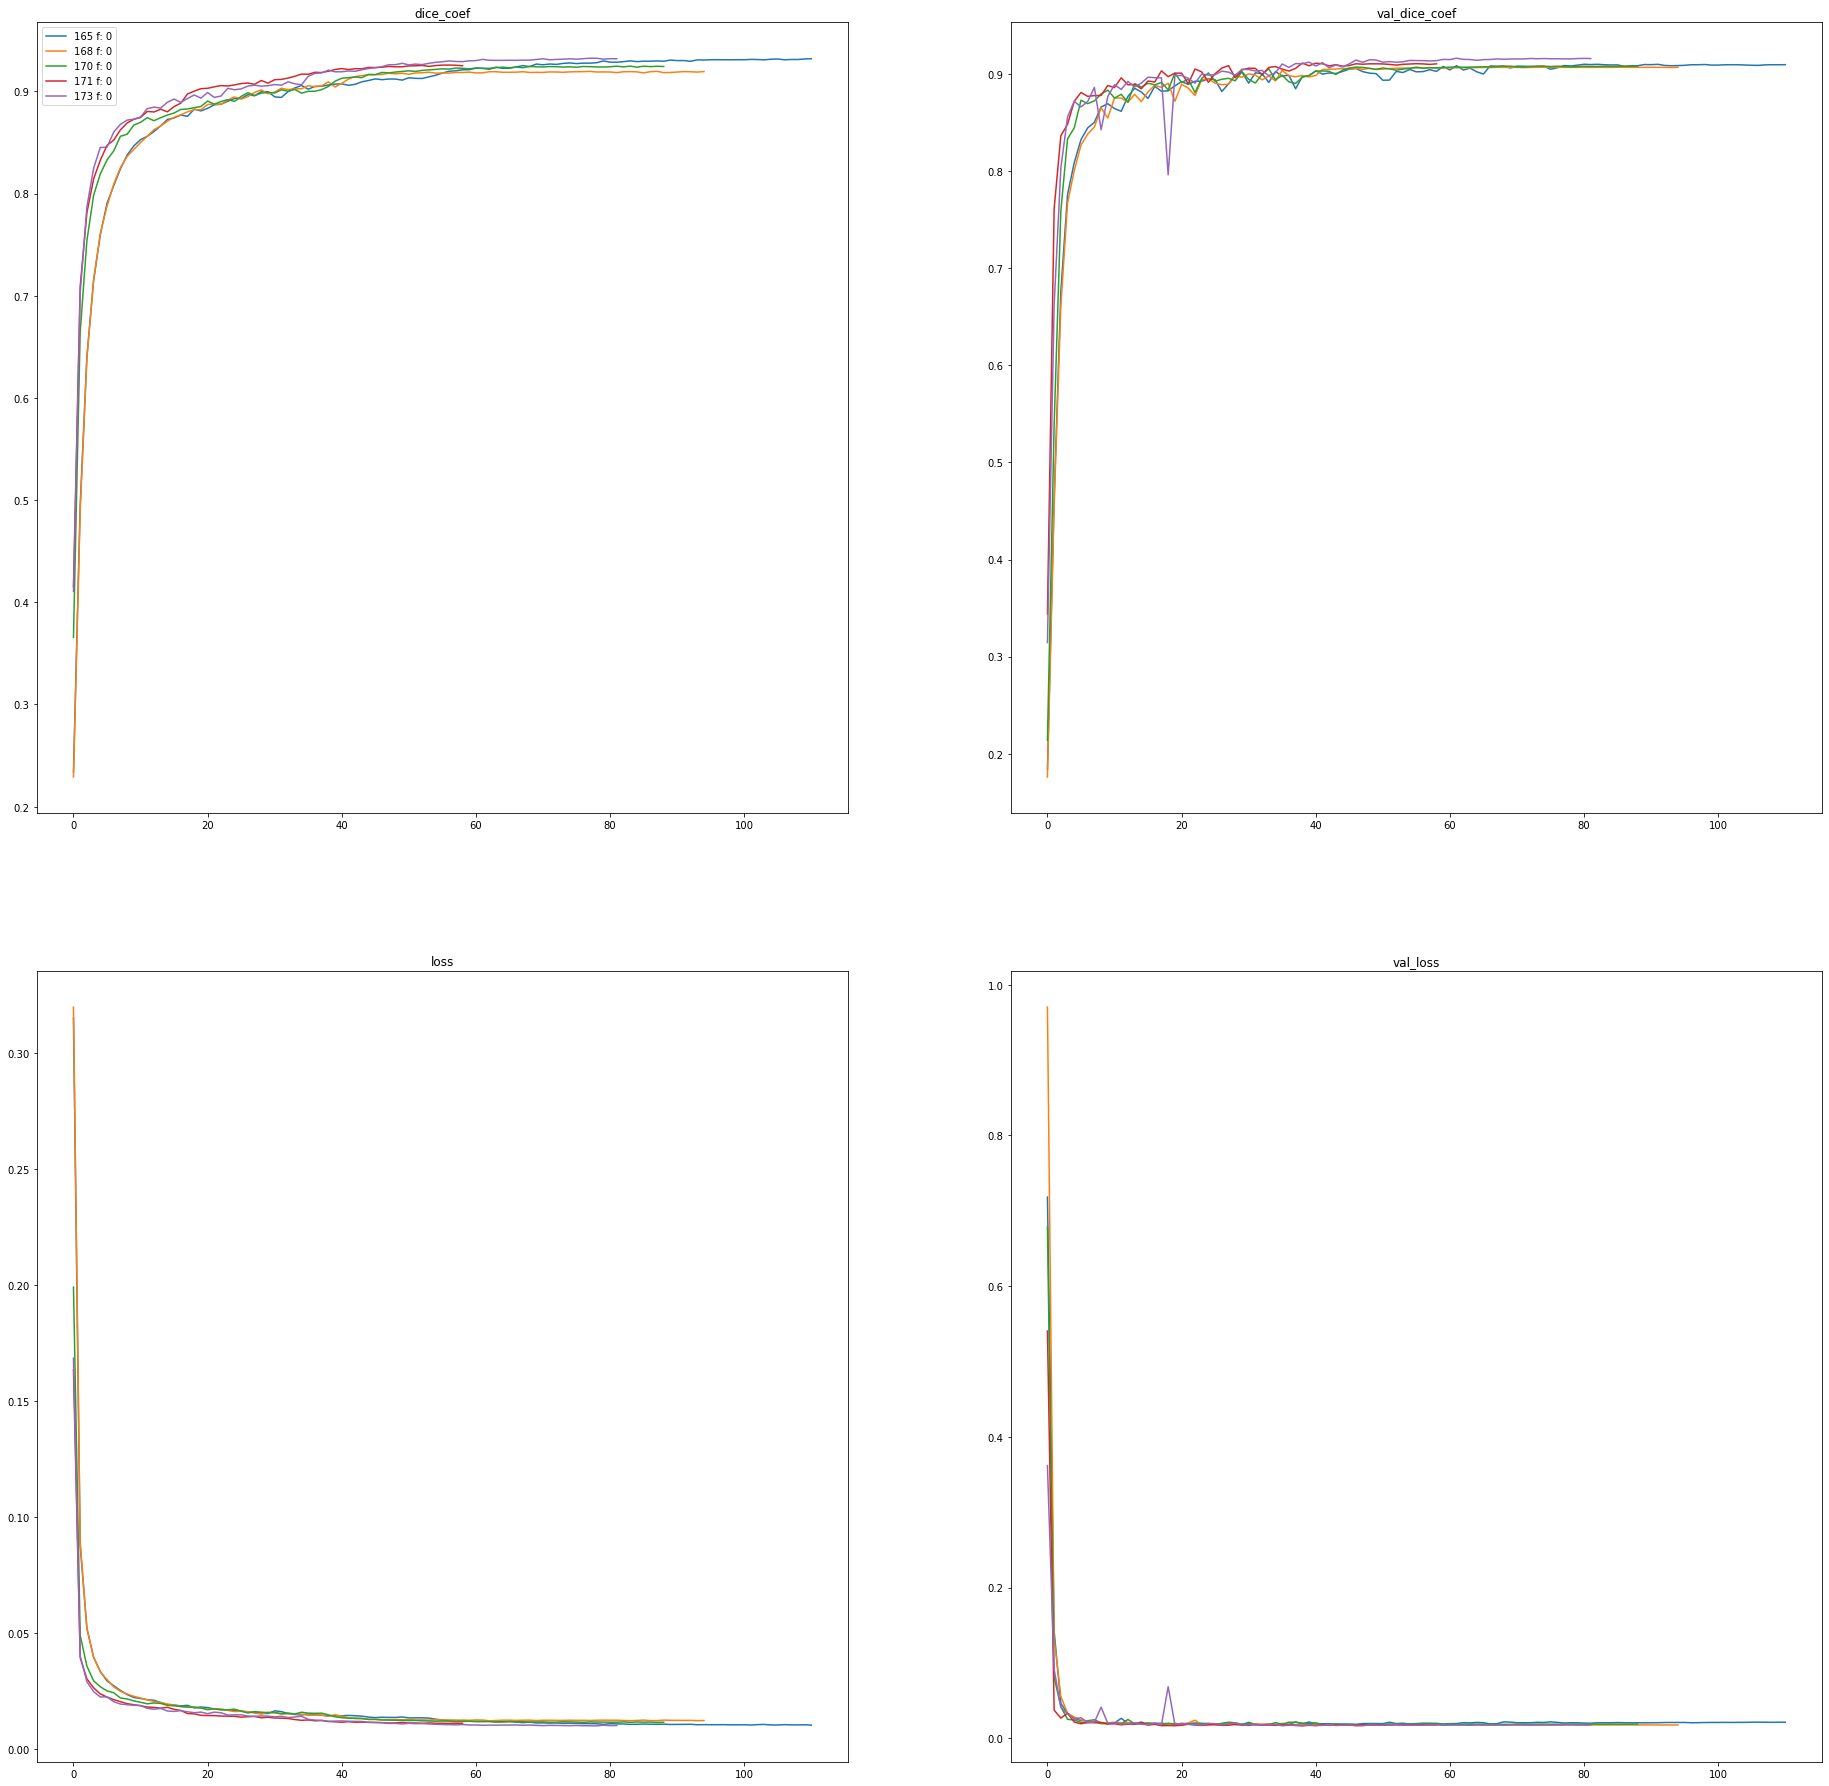

In [7]:
plot_vers([165, 168, 170, 171, 173])

In [19]:
mdl_df[mdl_df.version == 38]

,Unnamed: 0,version,folds,img_size,resize,batch_size,epochs,patience,backbone,loss,mirror,umodel,bce_weight,shift,pseudo,lr,best_epoch,best_loss,best_dice_coef,split,seed,bavg_epoch,bavg_loss,bavg_dice_coef,dice_by_folds,mixed_precision,aughard,norm,bnw,weights,triple,reduce_dims,ext
12,12,38,1,256,4,32,100,10,efficientnetb7,bce_dice,False,unet,1.0,True,NaN,0.0001,NaN,NaN,NaN,kfold,69.0,52.0,0.01793,0.922658,0.9227,True,False,NaN,NaN,NaN,NaN,NaN,NaN


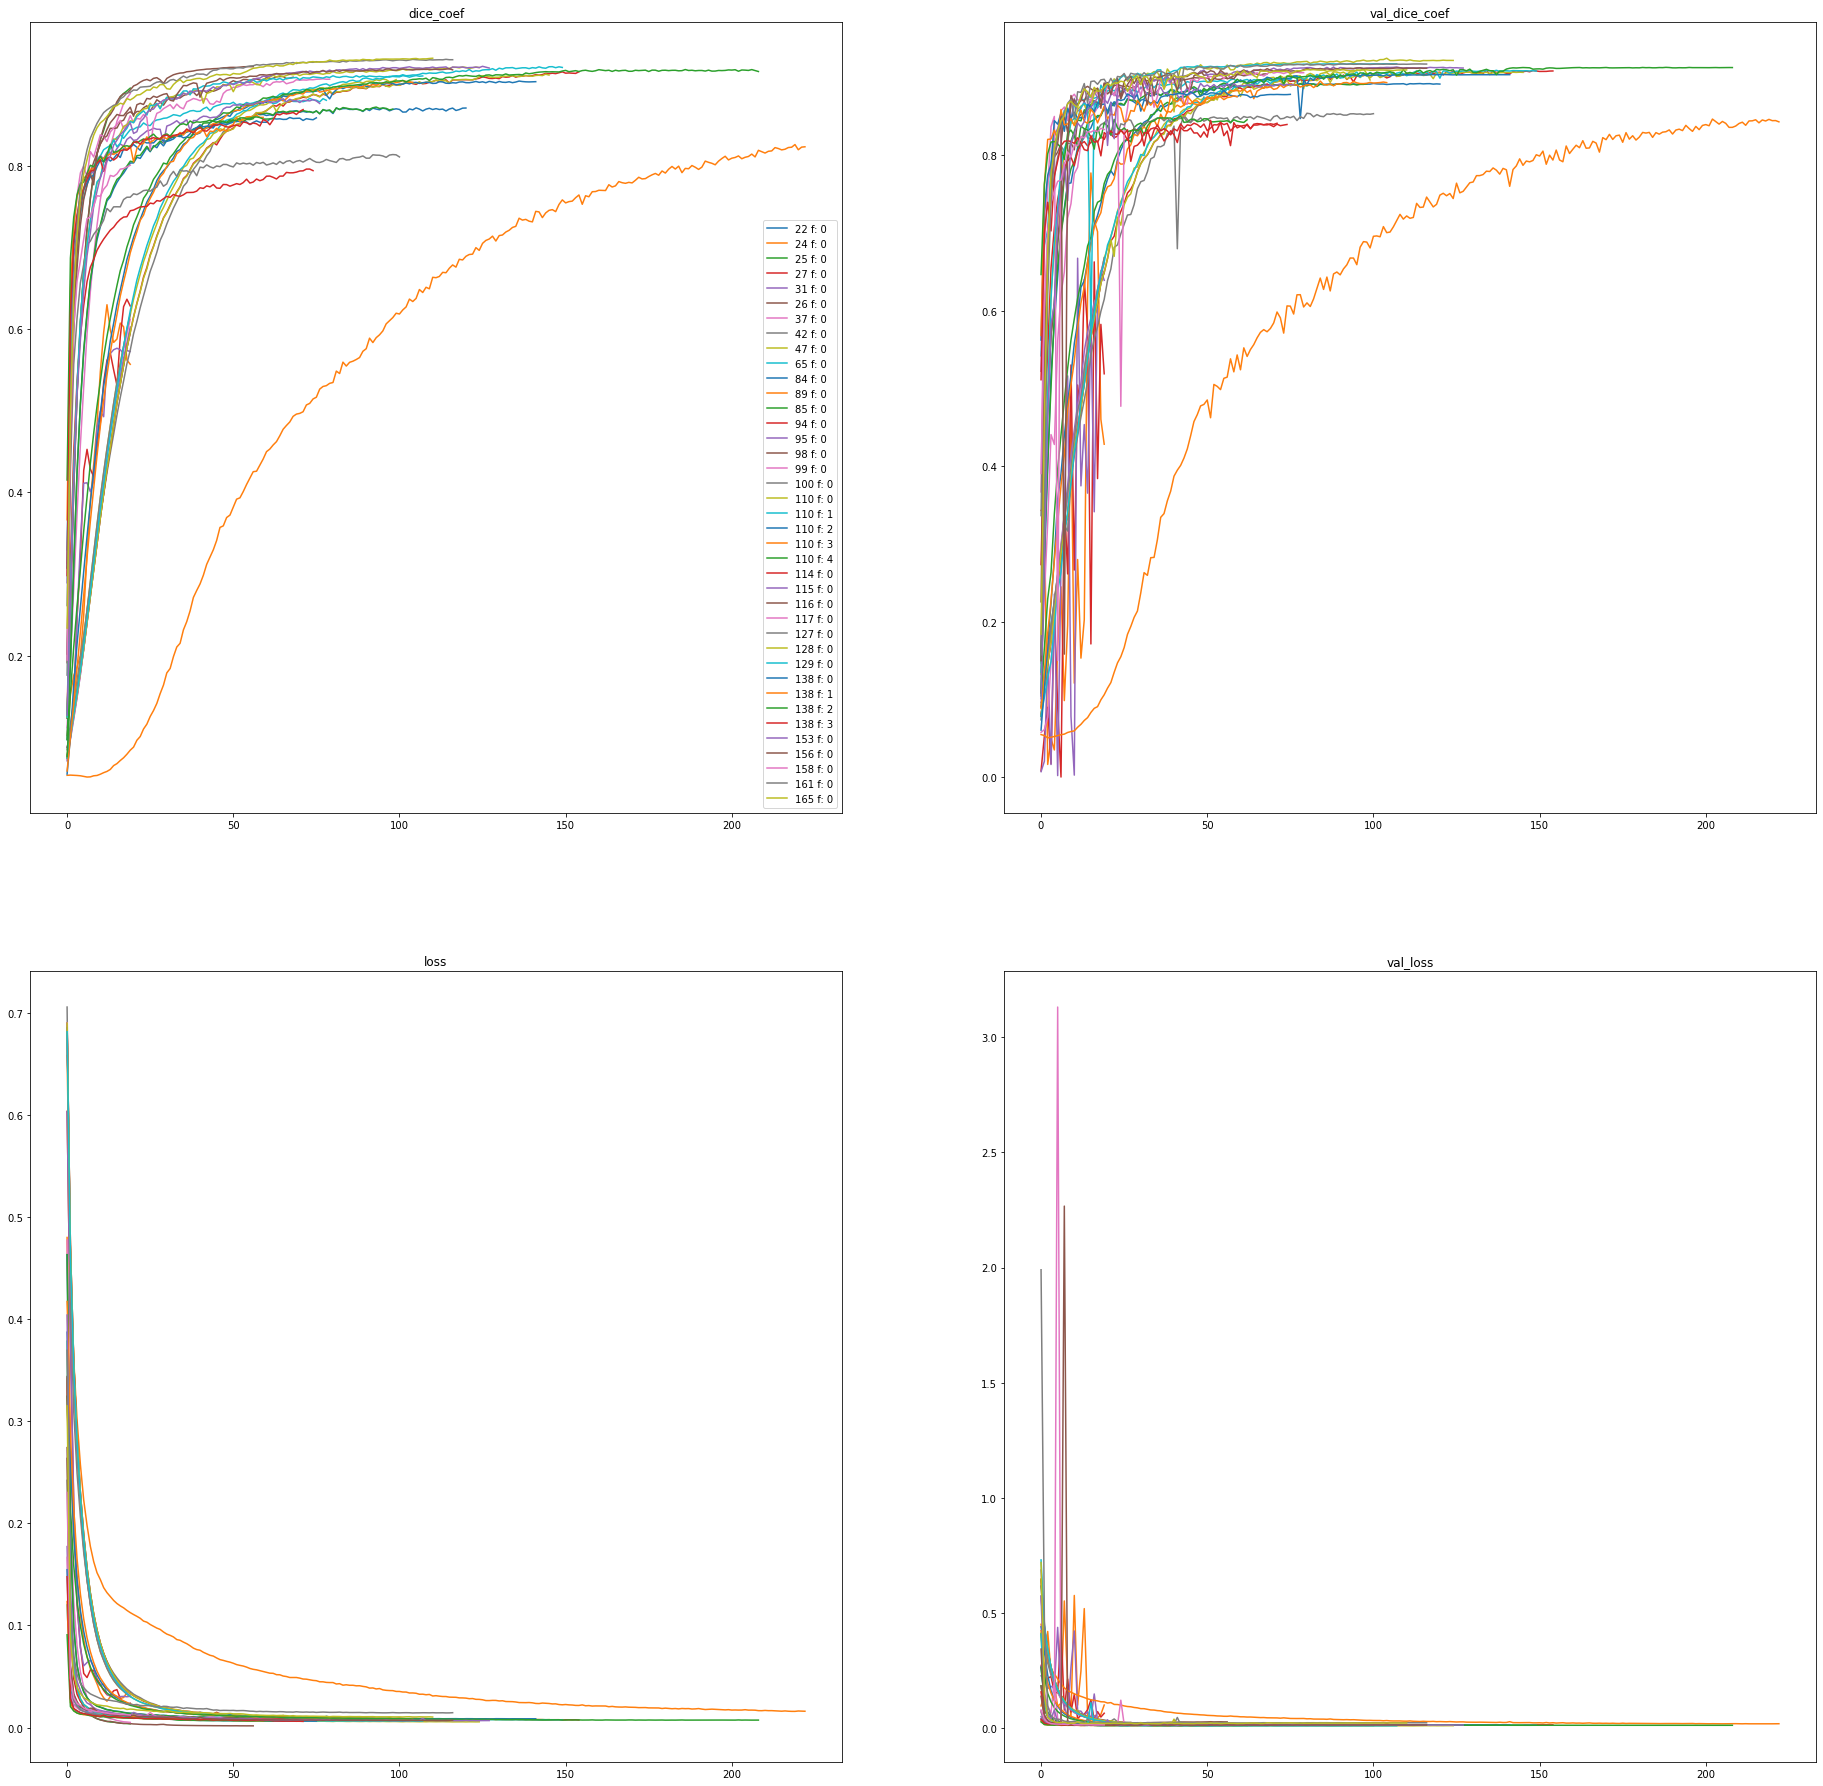

In [28]:
plot_vers(mdl_df[mdl_df.backbone == "efficientnetb0"].version)